In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.activations import linear, sigmoid, tanh, relu
from tensorflow.keras.layers import LeakyReLU, ELU

from keras.utils import plot_model
from keras.datasets import fashion_mnist
from IPython.display import clear_output, display, Math

In [3]:
CLASS_LABELS = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
INPUT_SHAPE = (28, 28, 1)
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train / 255., x_test / 255.

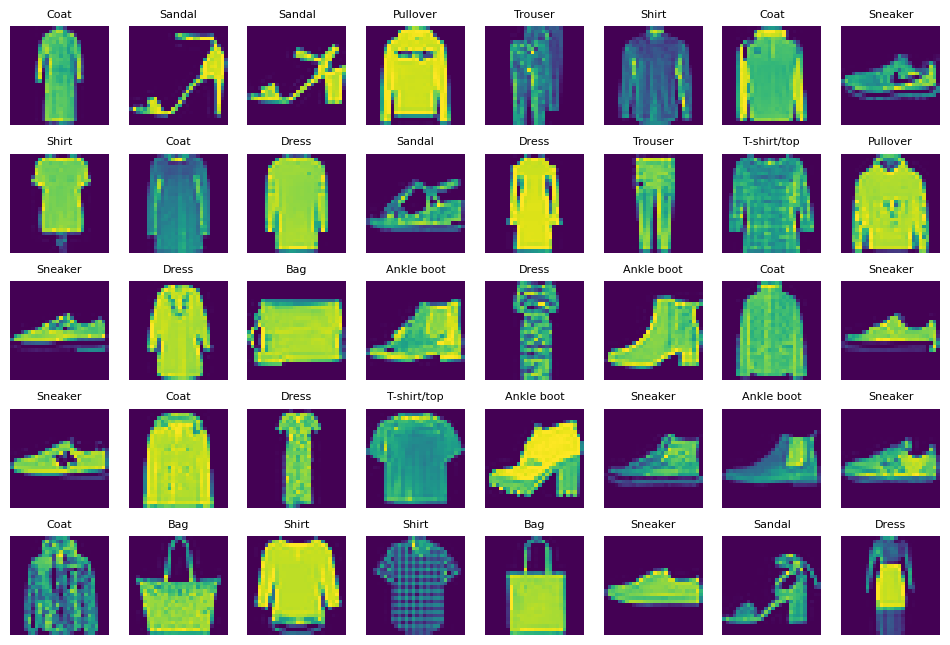

In [12]:
NUMBER_OF_IMAGES = 40
f, ax = plt.subplots(5, 8, figsize=(12, 8))

for i, sample_index in enumerate(np.random.randint(1, x_test.shape[0], NUMBER_OF_IMAGES)):
    test_image = x_test[sample_index].reshape(1, -1)
    test_item = y_test[sample_index]
    ax[i//8, i % 8].imshow(test_image[0].reshape((28, 28)))
    ax[i//8, i % 8].axis('off')
    ax[i//8, i %
        8].set_title(f"{CLASS_LABELS.get(test_item)}", fontsize=8)
plt.show()

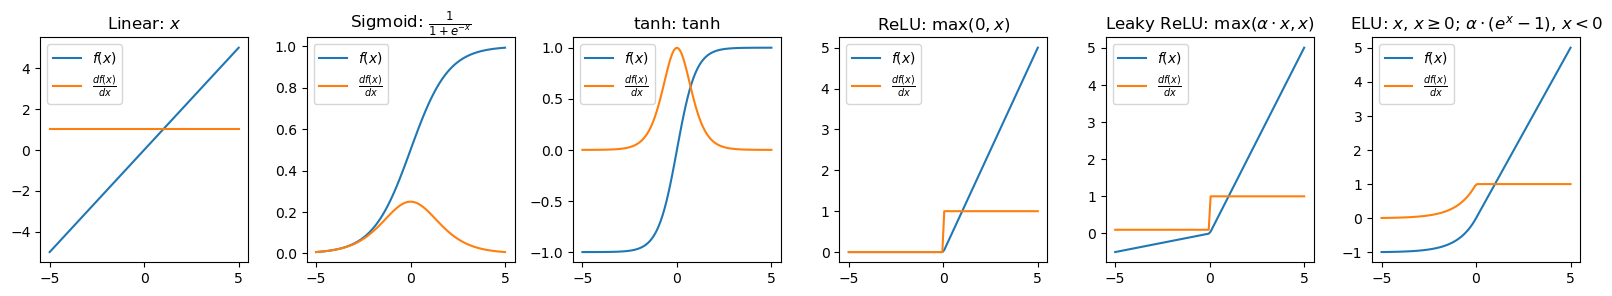

In [13]:
x = np.linspace(-5, 5, 100)
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)

activation_functions = [linear, sigmoid, tanh, relu, LeakyReLU(alpha=0.1), ELU(alpha=1.0)]
activation_names = ['Linear', 'Sigmoid', 'tanh', 'ReLU', 'Leaky ReLU', 'ELU']
analitic = [r'$x$', r'$\frac{1}{1 + e^{-x}}$', r'$\tanh$', r'$\max(0, x)$', r'$\max(\alpha\cdot x, x)$', r'$x$, $x \geq 0$; $\alpha\cdot(e^x - 1)$, $x < 0$']


plt.figure(figsize=(16, 16))

for i in range(len(activation_functions)):
    activation_name = activation_names[i]

    plt.subplot(6, 6, i + 1)
    plt.plot(x, activation_functions[i](x_tensor).numpy(), label=r'$f(x)$')
    plt.title(f'{activation_name}: {analitic[i]}')

    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y = activation_functions[i](x_tensor)
    derivative = tape.gradient(y, x_tensor).numpy()
    plt.plot(x, derivative, label=r'$\frac{df(x)}{dx}$')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
keras.utils.set_random_seed(42)

def build_model(learning_rate, l2_parameter):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(l2_parameter)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(64, activation='relu',
        kernel_regularizer=regularizers.l2(l2_parameter)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  )
    return model

In [16]:
EPOCHS = 50
STEPS_PER_EPOCH = 1_2000
BATCH_SIZE = 1 * 64
L2_PARAMETER = 1e-3
LEARNING_RATE = 1e-4

## Створення моделі

In [17]:
model = build_model(LEARNING_RATE, L2_PARAMETER)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10938

## Навчання моделі

In [18]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(256).prefetch(1)

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test)
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

Epoch 1/50


938/938 [==============================] - 7s 5ms/step - loss: 1.2328 - accuracy: 0.6736 - val_loss: 0.8693 - val_accuracy: 0.7920
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.8599 - accuracy: 0.7895 - val_loss: 0.7583 - val_accuracy: 0.8233
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.7617 - accuracy: 0.8176 - val_loss: 0.6983 - val_accuracy: 0.8318
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.7056 - accuracy: 0.8291 - val_loss: 0.6605 - val_accuracy: 0.8405
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.6650 - accuracy: 0.8383 - val_loss: 0.6305 - val_accuracy: 0.8468
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.6327 - accuracy: 0.8450 - val_loss: 0.6104 - val_accuracy: 0.8505
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 0.6080 - accuracy: 0.8498 - val_loss: 0.5875 - val_accuracy: 0.8560
Epoc

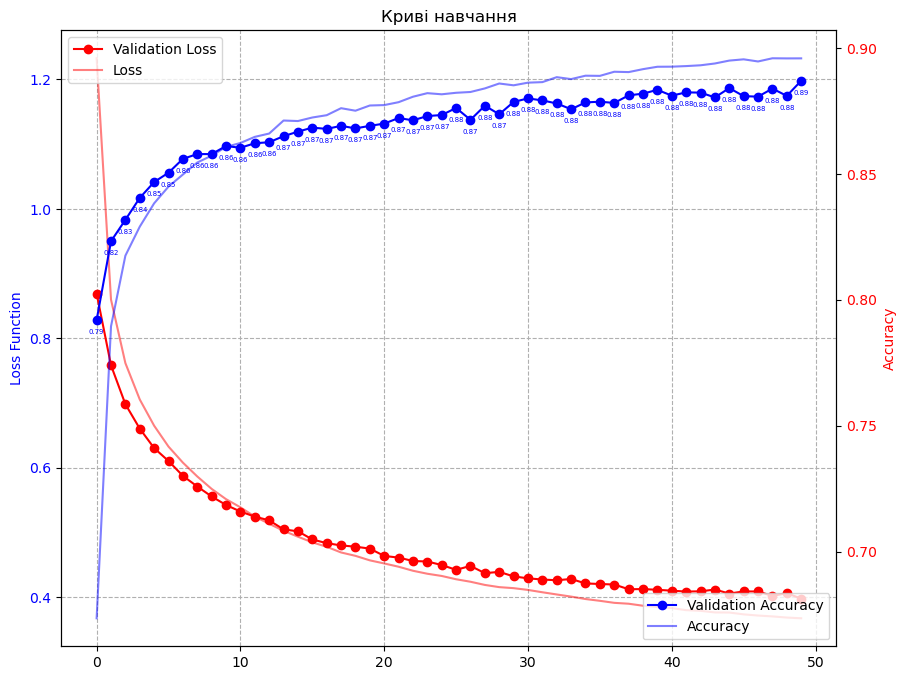

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='r')
ax1.plot(history.history['loss'], label='Loss', color='r', alpha=0.5)
ax1.set_ylabel('Loss Function', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy',  marker='o', color='b')
ax2.plot(history.history['accuracy'], label='Accuracy', color='b', alpha=0.5)
                         
for i, acc in enumerate(history.history['val_accuracy']):
    ax2.annotate(f'{acc:.2f}', (i, acc), textcoords="offset points", xytext=(0, -10), ha='center', c='b', fontsize=5)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax1.grid(True, linestyle='--') 

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.title('Криві навчання')

plt.show()

In [20]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


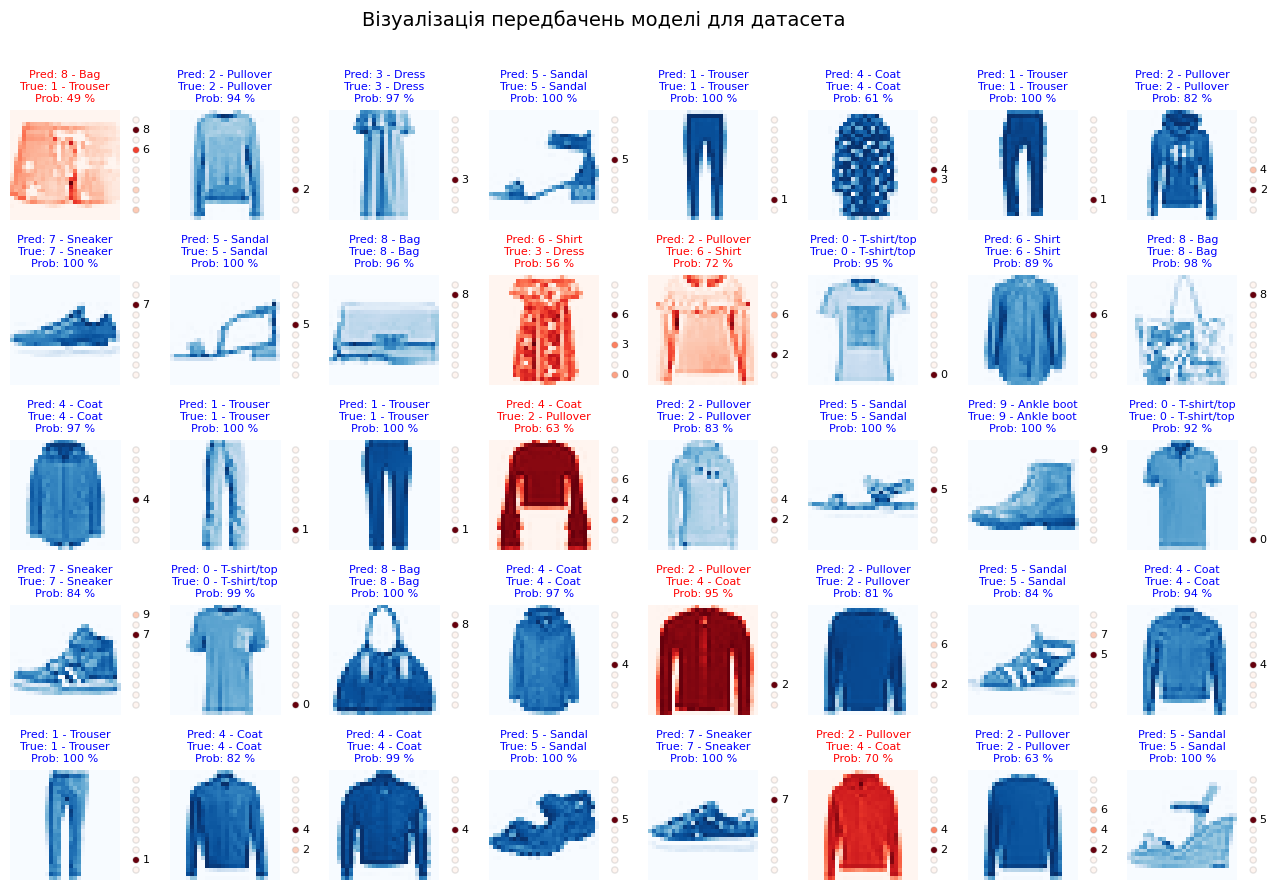

In [23]:
number_of_images = 40
f, ax = plt.subplots(5, 8, figsize=(16, 10))
f.subplots_adjust(hspace=0.5, wspace=0.3)

f.suptitle("Візуалізація передбачень моделі для датасету", fontsize=14)

for axes_index, sample_index in enumerate(np.random.choice(10000, number_of_images)):
    prob = predictions[sample_index]
    img, true_label = x_test[sample_index], y_test[sample_index]
    predicted_label = np.argmax(prob)
    if predicted_label == true_label:
        color = 'blue'
        cmap = 'Blues'
    else:
        color = 'red'
        cmap = 'Reds'

    ax[axes_index//8, axes_index % 8].imshow(img, cmap=cmap)
    ax[axes_index//8, axes_index % 8].axis('off')
    ax[axes_index//8, axes_index %
        8].set_title(f"Pred: {predicted_label} - {CLASS_LABELS.get(predicted_label)}\nTrue: {true_label} - {CLASS_LABELS.get(true_label)}\nProb: {prob.max()*100:.0f} %", fontsize=8, color=color)
    
    inset_ax = f.add_axes([ax[axes_index//8, axes_index % 8].get_position().x1, ax[axes_index//8, axes_index % 8].get_position().y0, 0.02, ax[axes_index//8, axes_index % 8].get_position().height])

    classes = np.arange(len(CLASS_LABELS))
    inset_ax.scatter(np.ones(10)*0.5, 
                     classes, 
                     s=20, 
                     c=prob, 
                     cmap='Reds', 
                     marker='o',
                     edgecolor=(0.5, 0.5, 0.5, 0.2),
                     linewidths=1,
                     )
    inset_ax.set_xlim(0, 1)
    inset_ax.set_ylim(-1, 10)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.axis('off')
    for i, p in enumerate(prob):
        if p > 0.1:
            inset_ax.text(0.7, i, f'{i}', fontsize=8, verticalalignment='center')

plt.show()